In [13]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### For each of the following questions
- formulate a null and alternative hypothesis (be as specific as you can be)
- then give an example of what the following would look like :
    - true positive: null is false and we reject null
    - true negative: null is true and we accept null
    - type I error (or False Positive): We reject the null but in reality it is true
    - type II errors (or False negative): fail to reject null but it is false

### Has the network latency gone up since we switched internet service providers?

- New Question: Is there an increase in the network latency before and after new internet service providers?

- Null Hypothesis: There is not a significant increase in network latency before and after new internet service providers

- Alt Hypothesis: There is a significant increase in network latency before and after new internet service providers

- True Pos: We say there is a significant increase in network latency before and after new internet service providers and that is correct in reality

- True Neg: We say there is not a significant increase in network latency before and after new internet service providers and that is correct in reality

- Type I error: We say there is a significant increase in network latency before and after new internet service providers but in reality there is not

- Type II error: We say there is not a significant increase in network latency before and after new internet service providers but in reality there is


### Is the website redesign any good?

- New Question: Is there an increase in the conversion rate before and after website redesign?
- Null Hypothesis: There is no change in conversion rate before and after website redesign
- Alt Hypothesis: There is a significant increase in conversion rate before and after website redesign
- True Pos: We say there is a significant increase in conversion rate before and after website redesign and that is correct in reality
- True Neg: We say there is not a significant increase in conversion rate before and after website redesign and that is correct in reality
- Type I error: We say there is a significant increase in conversion rate before and after website redesign but in reality there is not
- Type II error: We say there is not a significant increase in conversion rate before and after website redesign but in reality there is

### Is our television ad driving more sales?
- New Question: Is there an increase in sales after the new tv ad?
- Null Hypothesis: There is not a significant increase in sales before and after new tv ad
- Alt Hypothesis: There is a significant increase in sales before and after new tv ad
- True Pos: We say there is a significant increase in sales before and after new tv ad and that is correct in reality
- True Neg: We say there is not a significant increase in sales before and after new tv ad and that is correct in reality
- Type I error: We say there is a significant increase in sales before and after new tv ad but in reality there is not
- Type II error: We say there is not a significant increase in sales before and after new tv ad but in reality there is

### Questions to ask of Telco data

- Is there a relationship between monthly charges and :
    - tenure
    - gender
    - is_senior_citizen
    - payment_type
    - contract type
    - internet service
    - streaming tv
    - streaming movies
    
    
- Is there a relationship between churn and:
    - tenure
    - gender (Are male customers more likely to churn?)
    - is_senior_citizen (Are senior citizens more likely to churn?)
    - payment_type
    - contract type
    - phone service
    - internet service
    - streaming tv
    - streaming movies
    - dependents
    
    
- Are males more likely to stream tv and movies than females?


- Is there a difference in the length of tenure for men and women?


- Are customers with dependents more likely to have fiber optic internet?


- Are seniors more likely to have month to month contracts?

### Questions to ask of Zillow data

- Is there a relationship between price and:
    - sq footage
    - year built
    - number of stories
    - number of bedrooms
    - number of bathrooms
    - ac type
    - building class type
    - fireplace count
    - garage count
    - garage sq footage
    - heating systems
    - pool size
    - propety zone
    - zip code
    - tax amount
    - building class type
    - architectural style
    - construction type
    
    
    
- Do older properties have higher taxes?



- Is there a relationship between architecutral style and:
    - number of stories
    - ac type
    - zip code
    - year built
    - sq footage 
    - fireplace count
    - number of bedrooms
    - number of bathrooms
    - garage count
    - tax amount 
    - building class type
    - construction type
   

## t - test Exercises

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Are days to sell different for office 1 vs office 2?

$H_{0}$: Mean days to sell for office 1 = Mean days to sell for office 2  
$H_{a}$: Mean days to sell for office 1 != Mean days to sell for office 2 

We can use 2 sample, 2-tailed t-test here

In [7]:
alpha = 0.05

mu1 = 90
sd1 = 15
n1 = 40

mu2 = 100
sd2 = 20
n2 = 50

In [ ]:
# visualize the distribution



In [92]:
t, p = stats.ttest_ind_from_stats(mu1, sd1, n1, 
                                 mu2, sd2, n2, equal_var = False)

t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

negative t stat indicates that avg for office 2 is higher than that of office 1

In [93]:
p < alpha

True

In [10]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


There is a significant difference in mean days to sell for office 1 vs office 2

## Load the mpg dataset and use it to answer the following questions:

In [29]:
df = data('mpg')
df.head()
df.year.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [94]:
# using harmonic mean instead of arithmetic because the units are in mpg
df['avg_eff'] = stats.hmean(df[['cty', 'hwy']], axis =1)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [96]:
cars_08 = df[df.year == 2008].avg_eff
cars_08.head()

3     24.313725
4     24.705882
7     21.600000
10    23.333333
11    22.304348
Name: avg_eff, dtype: float64

In [37]:
cars_99 = df[df.year == 1999].avg_eff
cars_99.head()

1    22.212766
2    24.360000
5    19.809524
6    21.272727
8    21.272727
Name: avg_eff, dtype: float64

**Plot Distribution**

<AxesSubplot:>

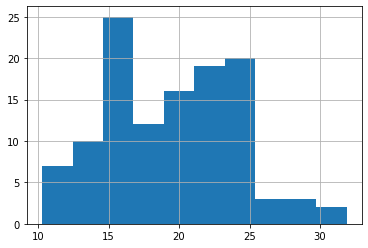

In [39]:
cars_08.hist()

<AxesSubplot:>

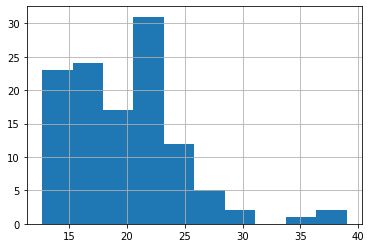

In [40]:
cars_99.hist()

both distributions do not appear to be normally distributed but the sample size is large enough

In [42]:
cars_08.count(), cars_99.count()

(117, 117)

**Hypothesis**

$H_{0}$: Fuel efficiency is the same for 2008 and 1999 vehicles

$H_{a}$: Fuel efficiency is not the same for 2008 and 1999 vehicles

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [97]:
# do two samples have similar variances?

cars_08.var(), cars_99.var()

(22.550836772260343, 25.850396545865912)

In [45]:
stats.levene(cars_08, cars_99)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

the variances are not too different from each other so we will assume they meet the equal variances requirement

In [46]:
# use Scipy's independent ttest to find t and p

t, p = stats.ttest_ind(cars_08, cars_99)

t, p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

**Decide**

is p-value less than alpha? 

In [47]:
p < alpha

False

Since the p-value is greater than alpha we fail to reject the null hypothesis. Fuel efficiency for 2008 and 1999 vehicles is the same

### Are compact cars more fuel-efficient than the average car?

In [51]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

<AxesSubplot:>

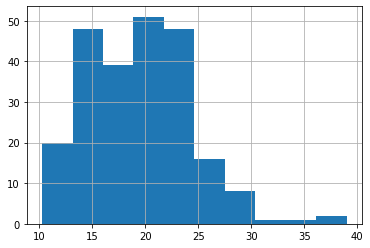

In [69]:
# plot distribution of average fuel efficiency
df.avg_eff.hist() # slightly skewed, not normal dist

<AxesSubplot:>

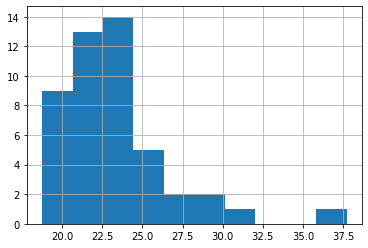

In [56]:
# plot distribution of avg efficiency for compact cars

compact_cars = df[df['class'] == 'compact'].avg_eff
compact_cars.hist() # not normal dist

**B. Set Hypothesis**

$H_{0}$: Avg fuel efficiency of compact cars = Avg fuel efficiency of all other cars

$H_{a}$: Avg fuel efficiency of compact cars > Avg fuel efficiency of all other cars
    
**C. Set Alpha**


In [59]:
# we decide on 95% cofidence level (alpha = 0.05)
alpha = 0.05

**D. Verify Assumptions**

In [61]:
# How big is sample size for comapct cars?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

df['class'].value_counts()
# we are interested in compact cars

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

**E. Compute test statistic and probability (t-statistic & p-value)**

- do a 1 sample 1 tailed t-test
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0

In [63]:
# overall mean of population
overall_mean = df.avg_eff.mean()

In [64]:
# calculate t and p statistic

t, p = stats.ttest_1samp(compact_cars, overall_mean)

t, p/2, alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [66]:
if (p/2 < alpha) & (t >0):
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

We reject the null hypothesis


Compact cars are more fuel efficient that the average car


### Do manual cars get better gas mileage than automatic cars?

In [75]:
df.head()
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [72]:
auto_cars = df[df['trans'].str.contains('auto')].avg_eff
manual_cars = df[df['trans'].str.contains('manual')].avg_eff

<AxesSubplot:>

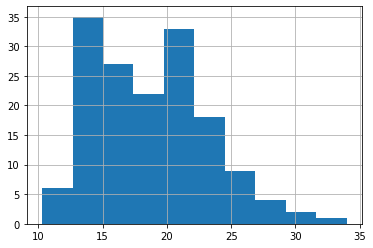

In [79]:
# plot distribution of avg efficiency for automatic cars
auto_cars.hist()

<AxesSubplot:>

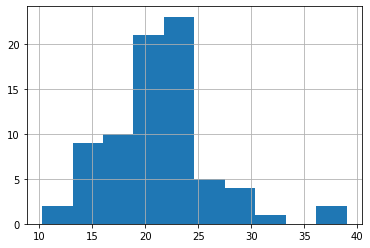

In [80]:
# plot distribution of avg efficiency for manual cars
manual_cars.hist()


In [78]:
auto_cars.count(), manual_cars.count()

(157, 77)

both histograms are not perfectly normally distributed but the sample sizes are large enough

2 sample, 1 tailed t-test

**Set Hypothesis**

$H_{0}$: Avg fuel efficiency of manual cars = Avg fuel efficiency of automatic cars   
$H_{a}$: Avg fuel efficiency of manual cars > Avg fuel efficiency of automatic cars  

    
**Set Alpha**

In [82]:
alpha = 0.05

**Verify Assumptions**

1. Independent Samples. YES! no observations in the auto sample exist in the manual sample. 

2. Normal Distribution - not really but sample size > 30

3. Equal Variances 

In [84]:
auto_cars.var(), manual_cars.var()

(20.428279095002054, 25.665633639828275)

In [85]:
stats.levene(auto_cars, manual_cars)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

variances are not significantly different from each other so we will say they are the same 


**Compute Test Statistic**

In [88]:
t, p = stats.ttest_ind(manual_cars, auto_cars)

t, p/2, alpha

(4.652577547151351, 2.7552323050220026e-06, 0.05)

In [89]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [90]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Manual cars get better mileage than automatic cars